<center><h1>Image Classification(CNN)</h1></center>

<h3> Import Data set</h3>

In [1]:
import numpy as np 
import pandas as pd 

data=pd.read_csv("fashion-mnist_test.csv")
xdata=data.drop("label",axis=1)
ydata=data["label"]
print(xdata)
print(ydata)


      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0       0       0   
9998       0       1       3       0       0       0       0       0       0   
9999       0       0       0       0       0       0       0     140     119   

      pixel10  ...  pixel775  pixel776 

<h3> Transforming Xdata into grid Matrix (28X28)</h3>

In [11]:
newdata=[]
for q in np.array(xdata):
    q=np.array(q).reshape(28,28)
    newdata.append(q)
xdata=newdata

<h3>Visualizing xdata</h3>

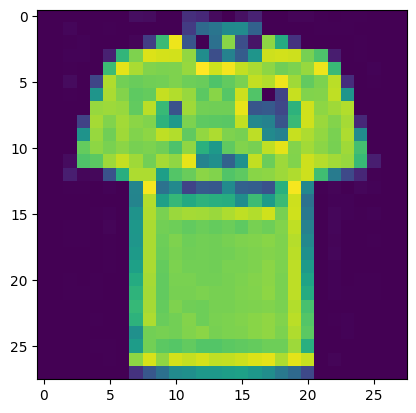

In [12]:
import matplotlib.pyplot as plt
plt.imshow(xdata[0])

<h3> Implementing CNN model</h3>

In [19]:

from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

xdata=np.array(xdata)
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.2,random_state=42)



model = Sequential([
    Conv2D(filters=10,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)), 
    MaxPooling2D((2,2)),
    Conv2D(filters=20,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)), 
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'), 
    Dense(10, activation='softmax') 
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



<h3>Model Training</h3>

In [20]:
model.fit(xtrain,ytrain,epochs=5) 

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5187 - loss: 4.7395
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7594 - loss: 0.7069
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8031 - loss: 0.5430
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8504 - loss: 0.4129
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8644 - loss: 0.3682


<h3>Evaluation and Prediction</h3>

In [21]:
model.evaluate(xtest,ytest)
ypredict=model.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8080 - loss: 0.5512
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<h3>Comparing Prediction</h3>

In [37]:
finalpredict=[]
for i in ypredict[:10]:
 finalpredict.append(int(np.argmax(i)))
finalpredict


[4, 9, 0, 0, 9, 1, 5, 1, 6, 8]

In [39]:

list(ytest[:10])

[4, 9, 6, 0, 9, 1, 5, 1, 6, 8]